## `rivas_decomposition_py` package examples

In [1]:
%matplotlib inline

from __future__ import print_function

from functools import reduce
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import itertools as it
import os
import re
import textwrap
import logging

from logging.config import dictConfig


#### plot functions
- https://github.com/yk-tanigawa/yt_misc_py

In [2]:
import yt_misc_py as yt_misc

In [3]:
import rivas_decomposition_py as decomposition

In [4]:
dictConfig(dict(
    version = 1,
    formatters = {
        'f': {'format':
              '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}
        },
    handlers = {
        'h': {'class': 'logging.StreamHandler',
              'formatter': 'f',
              'level': logging.DEBUG}
        },
    root = {
        'handlers': ['h'],
        'level': logging.DEBUG,
        },
))

In [5]:
font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 16
}

matplotlib.rc('font', **font)

## read a npz file 

In [6]:
d = decomposition.decomposition(os.path.join(
    '../../../', 'private_data', 
    'npz', 
    'dev_PTVsNonMHC_z_nonCenter_p0001_100PCs.npz'))


2018-01-21 17:38:44,125 data_load_from_npz INFO     reading data from ../../../private_data/npz/dev_PTVsNonMHC_z_nonCenter_p0001_100PCs.npz


## scree plot

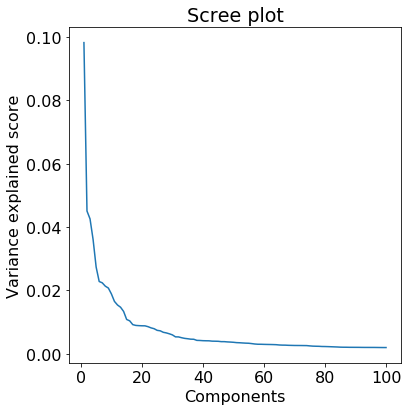

In [8]:
yt_misc.plot(d.plot_data_scree())

## Phenotype PCA plot

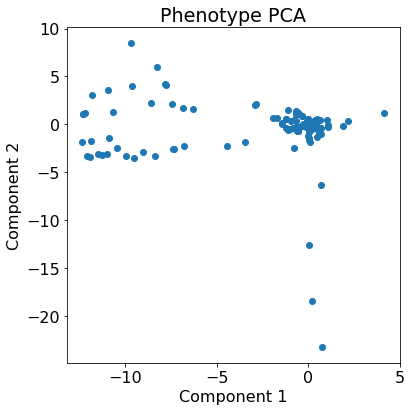

In [9]:
yt_misc.plot_scatter(d.plot_data_pca_phe(0, 1))

## Variant PCA plot

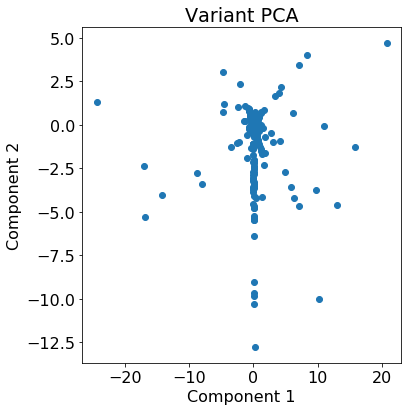

In [10]:
yt_misc.plot_scatter(d.plot_data_pca_var(0, 1))

## Squared cosine scores for a given phenotype

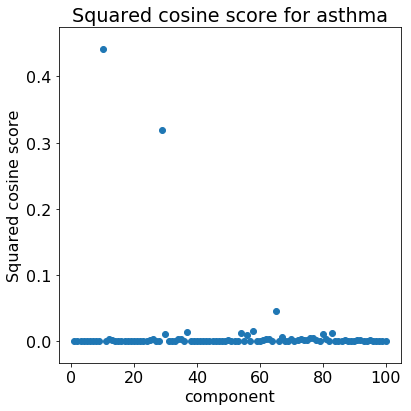

In [11]:
yt_misc.plot_scatter(d.plot_data_cos_phe_by_label('asthma'))

## Contribution score plots

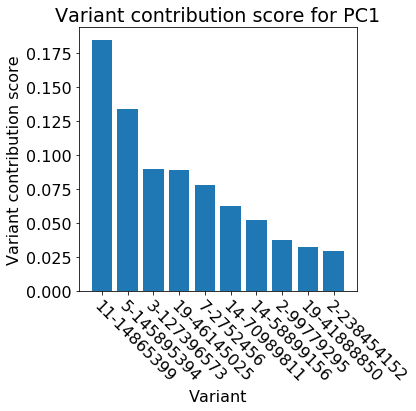

In [12]:
yt_misc.plot_bar(d.plot_data_contribution_var(0, topk = 10))

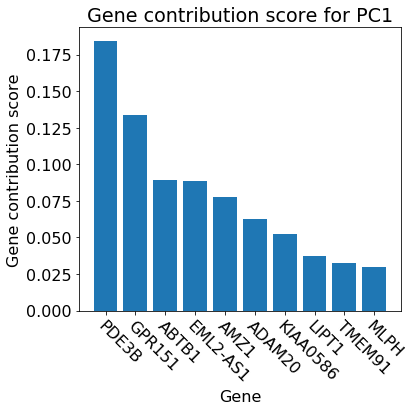

In [13]:
yt_misc.plot_bar(d.plot_data_contribution_gene(0, topk = 10))

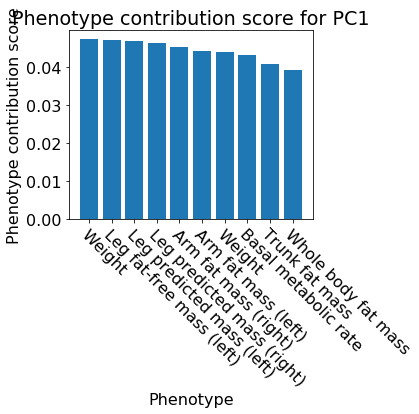

In [14]:
yt_misc.plot_bar(d.plot_data_contribution_phe(0, topk = 10))

#### one can supress xticklabes

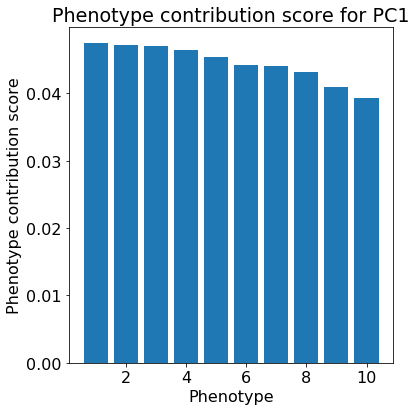

In [15]:
yt_misc.plot_bar(
    d.plot_data_contribution_phe(0, topk = 10), 
    ignore=['xticklabels'])

### list of top k variants

In [17]:
d.bed_data_contribution_var(pc_index=0, topk=15)

,chrom,chromStart,chromEnd,name
0,chr11,14865399,14865400,1.8440e-01
1,chr5,145895394,145895395,1.3359e-01
2,chr3,127396573,127396574,8.9425e-02
3,chr19,46145025,46145026,8.8784e-02
4,chr7,2752456,2752457,7.7577e-02
5,chr14,70989811,70989812,6.2517e-02
6,chr14,58899156,58899157,5.2402e-02
7,chr2,99779295,99779296,3.7252e-02
8,chr19,41888850,41888851,3.2532e-02
9,chr2,238454152,238454153,2.9671e-02


#### list of genes with contribution score >= 0.005

In [19]:
print(d.text_data_contribution_gene(pc_index=9, contribution_thr=0.005)[0])

IL33,0.7706
CSF2RB,0.0961
PLEKHG4,0.0307
FLG,0.0131
C10orf25,0.0119
SLFN13,0.0110
ARMS2,0.0097
DDX55,0.0071
NIPSNAP3A,0.0069
IFNK,0.0068
SEMA4F,0.0065
EML2-AS1,0.0060


### stacked bar plot

#### show top 10 genes

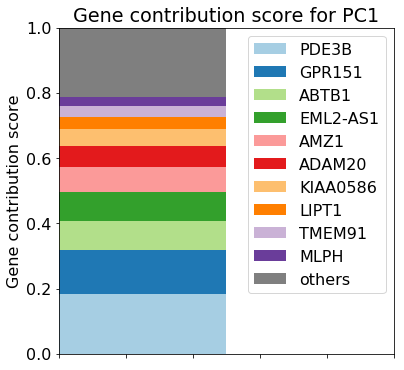

In [20]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]
ax = fig_axs[0]
## here we get the data
plotd = d.plot_data_contribution_gene(0, append_others=True, topk = 10)
ax = yt_misc.plot_ax_stacked_bar(
    ax, plotd['y'], plotd['xticklabels'], title = plotd['title'],
    ylabel = plotd['ylabel'], show_yticklabels = True,
    show_legend=True, bar_width=0.5
)

#### genes with contribution score >= 0.03

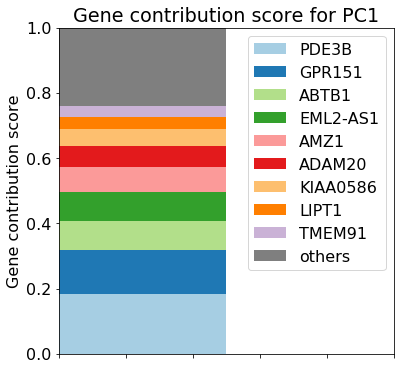

In [21]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]
ax = fig_axs[0]
## here we get the data
plotd = d.plot_data_contribution_generic('gene', 0, append_others=True, contribution_thr=0.03)
ax = yt_misc.plot_ax_stacked_bar(
    ax, plotd['y'], plotd['xticklabels'], title = plotd['title'],
    ylabel = plotd['ylabel'], show_yticklabels = True,
    show_legend=True, bar_width=0.5
)


#### plot k-most large genes that covers 80% of contribution scores

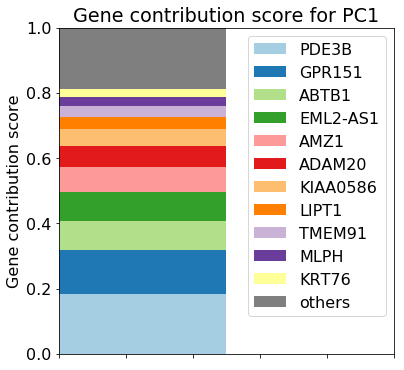

In [22]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]
ax = fig_axs[0]
## here we get the data
plotd = d.plot_data_contribution_generic('gene', 0, append_others=True, contribution_cumsum_thr=0.8)
ax = yt_misc.plot_ax_stacked_bar(
    ax, plotd['y'], plotd['xticklabels'], title = plotd['title'],
    ylabel = plotd['ylabel'], show_yticklabels = True,
    show_legend=True, bar_width=0.5
)

#### phenotype contribution scores

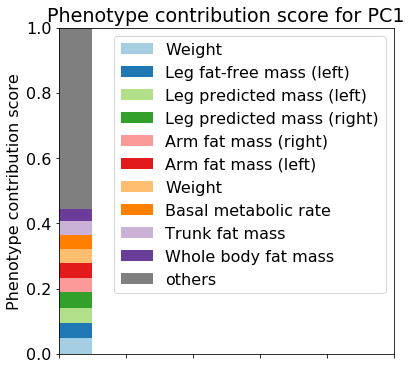

In [23]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]
ax = fig_axs[0]
## here we get the data
plotd = d.plot_data_contribution_phe(0, 10, append_others=True)
ax = yt_misc.plot_ax_stacked_bar(
    ax, plotd['y'], plotd['xticklabels'], title = plotd['title'],
    ylabel = plotd['ylabel'], show_yticklabels = True,
    show_legend=True, bar_width=0.1
)

## global contribution score plots

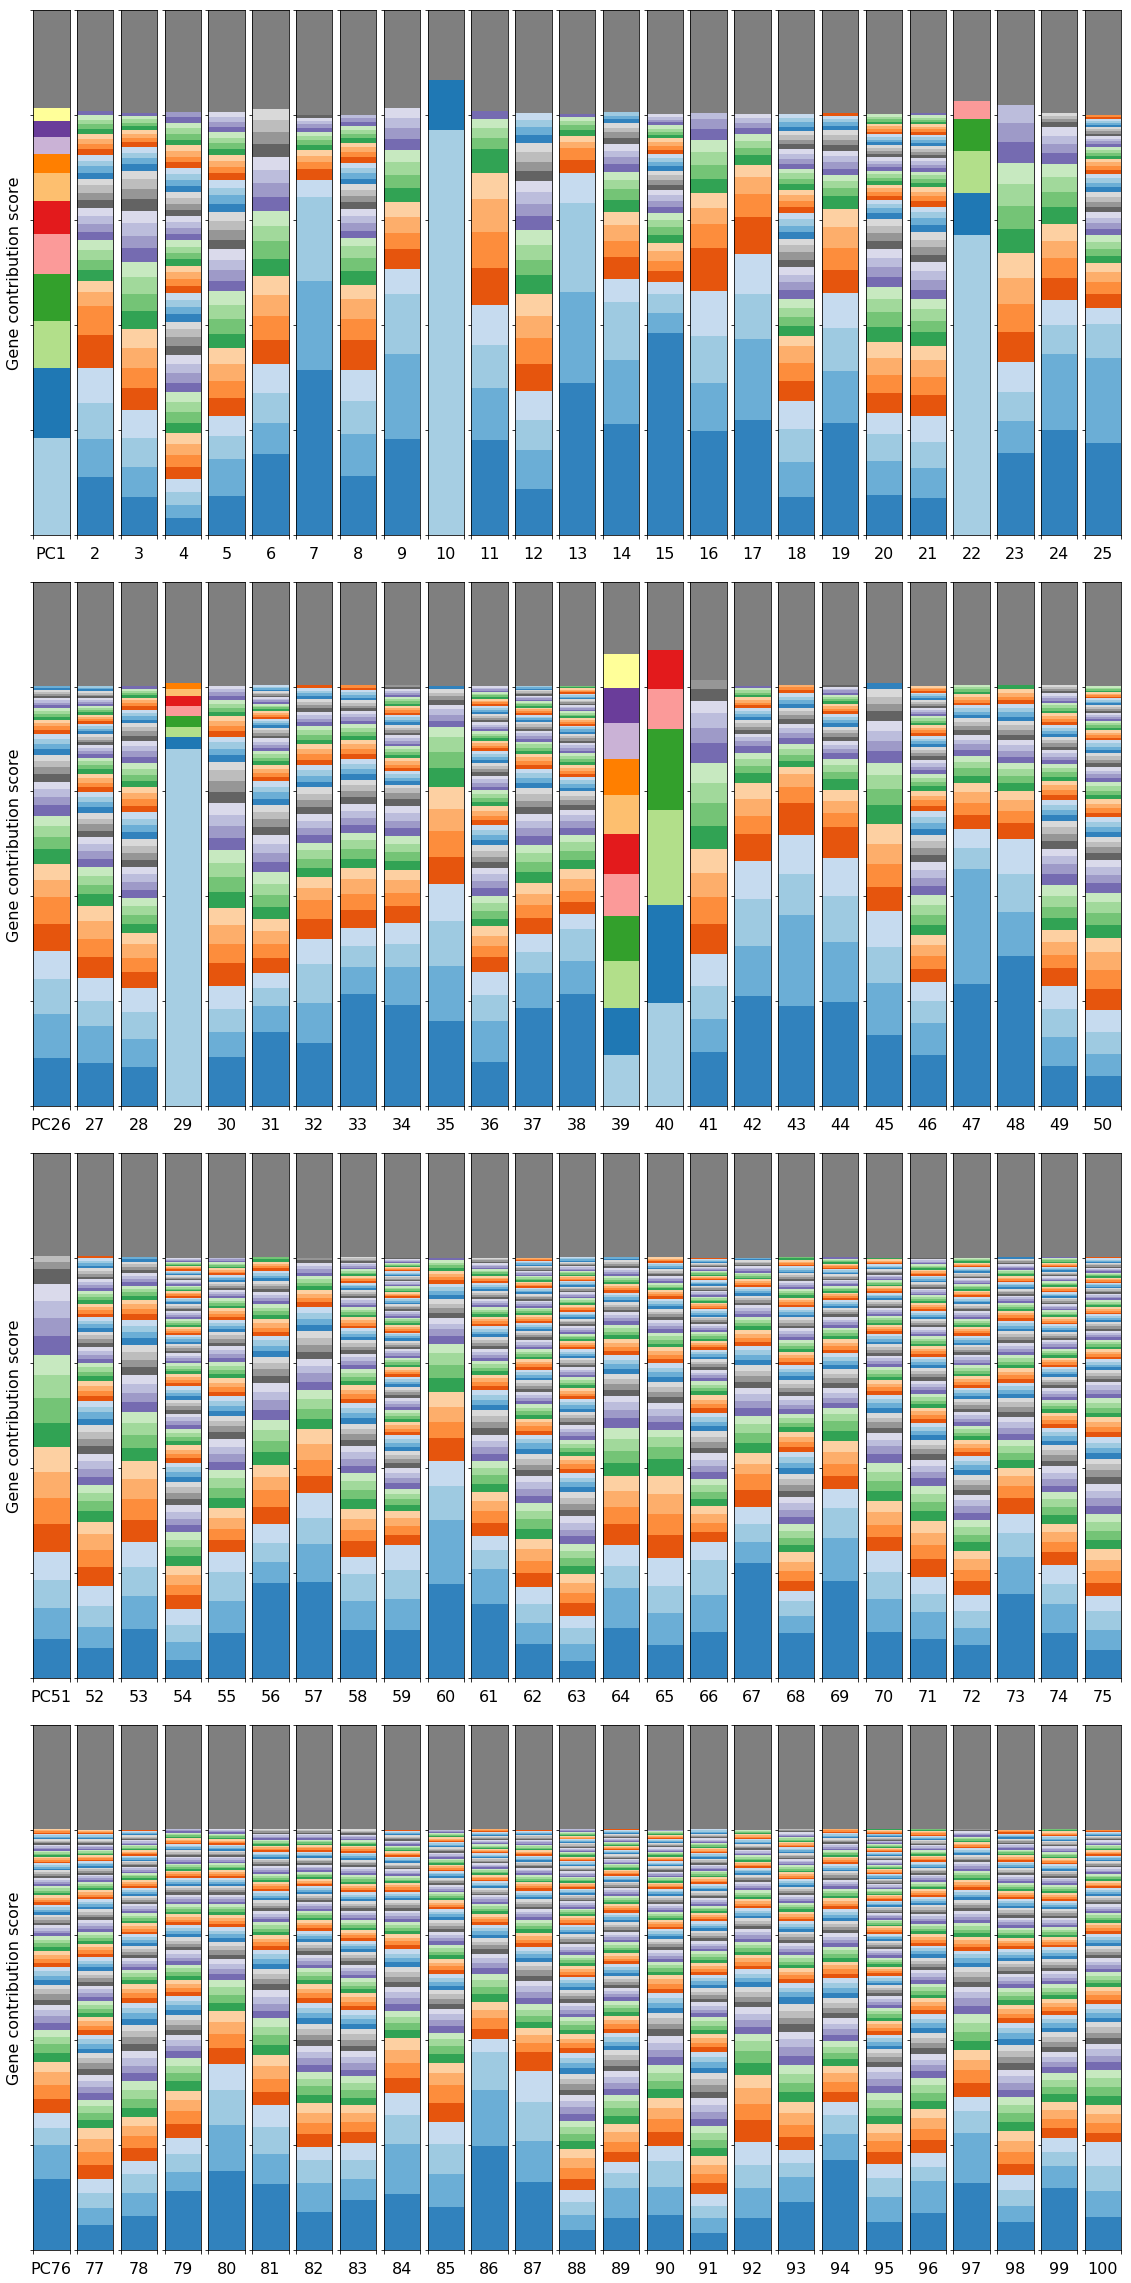

In [24]:
fig = plt.figure(figsize=(16, 32))
gs = gridspec.GridSpec(4, 25)
fig_axs = [fig.add_subplot(sp) for sp in gs]

for i in range(0, 100):
    plotd = d.plot_data_contribution_gene(i, contribution_cumsum_thr=0.80, append_others=True)
    if(i % 25 == 0):
        
        fig_axs[i] = yt_misc.plot_ax_stacked_bar(
            fig_axs[i], plotd['y'], plotd['xticklabels'], 
            ylabel = plotd['ylabel'], xlabel = 'PC{}'.format(i + 1))
    else:
        fig_axs[i] = yt_misc.plot_ax_stacked_bar(
            fig_axs[i], plotd['y'], plotd['xticklabels'], 
            show_xticklabels = False, xlabel = str(i + 1))
        
gs.tight_layout(fig, rect=[0, 0, 1, 1], w_pad=-.1) 

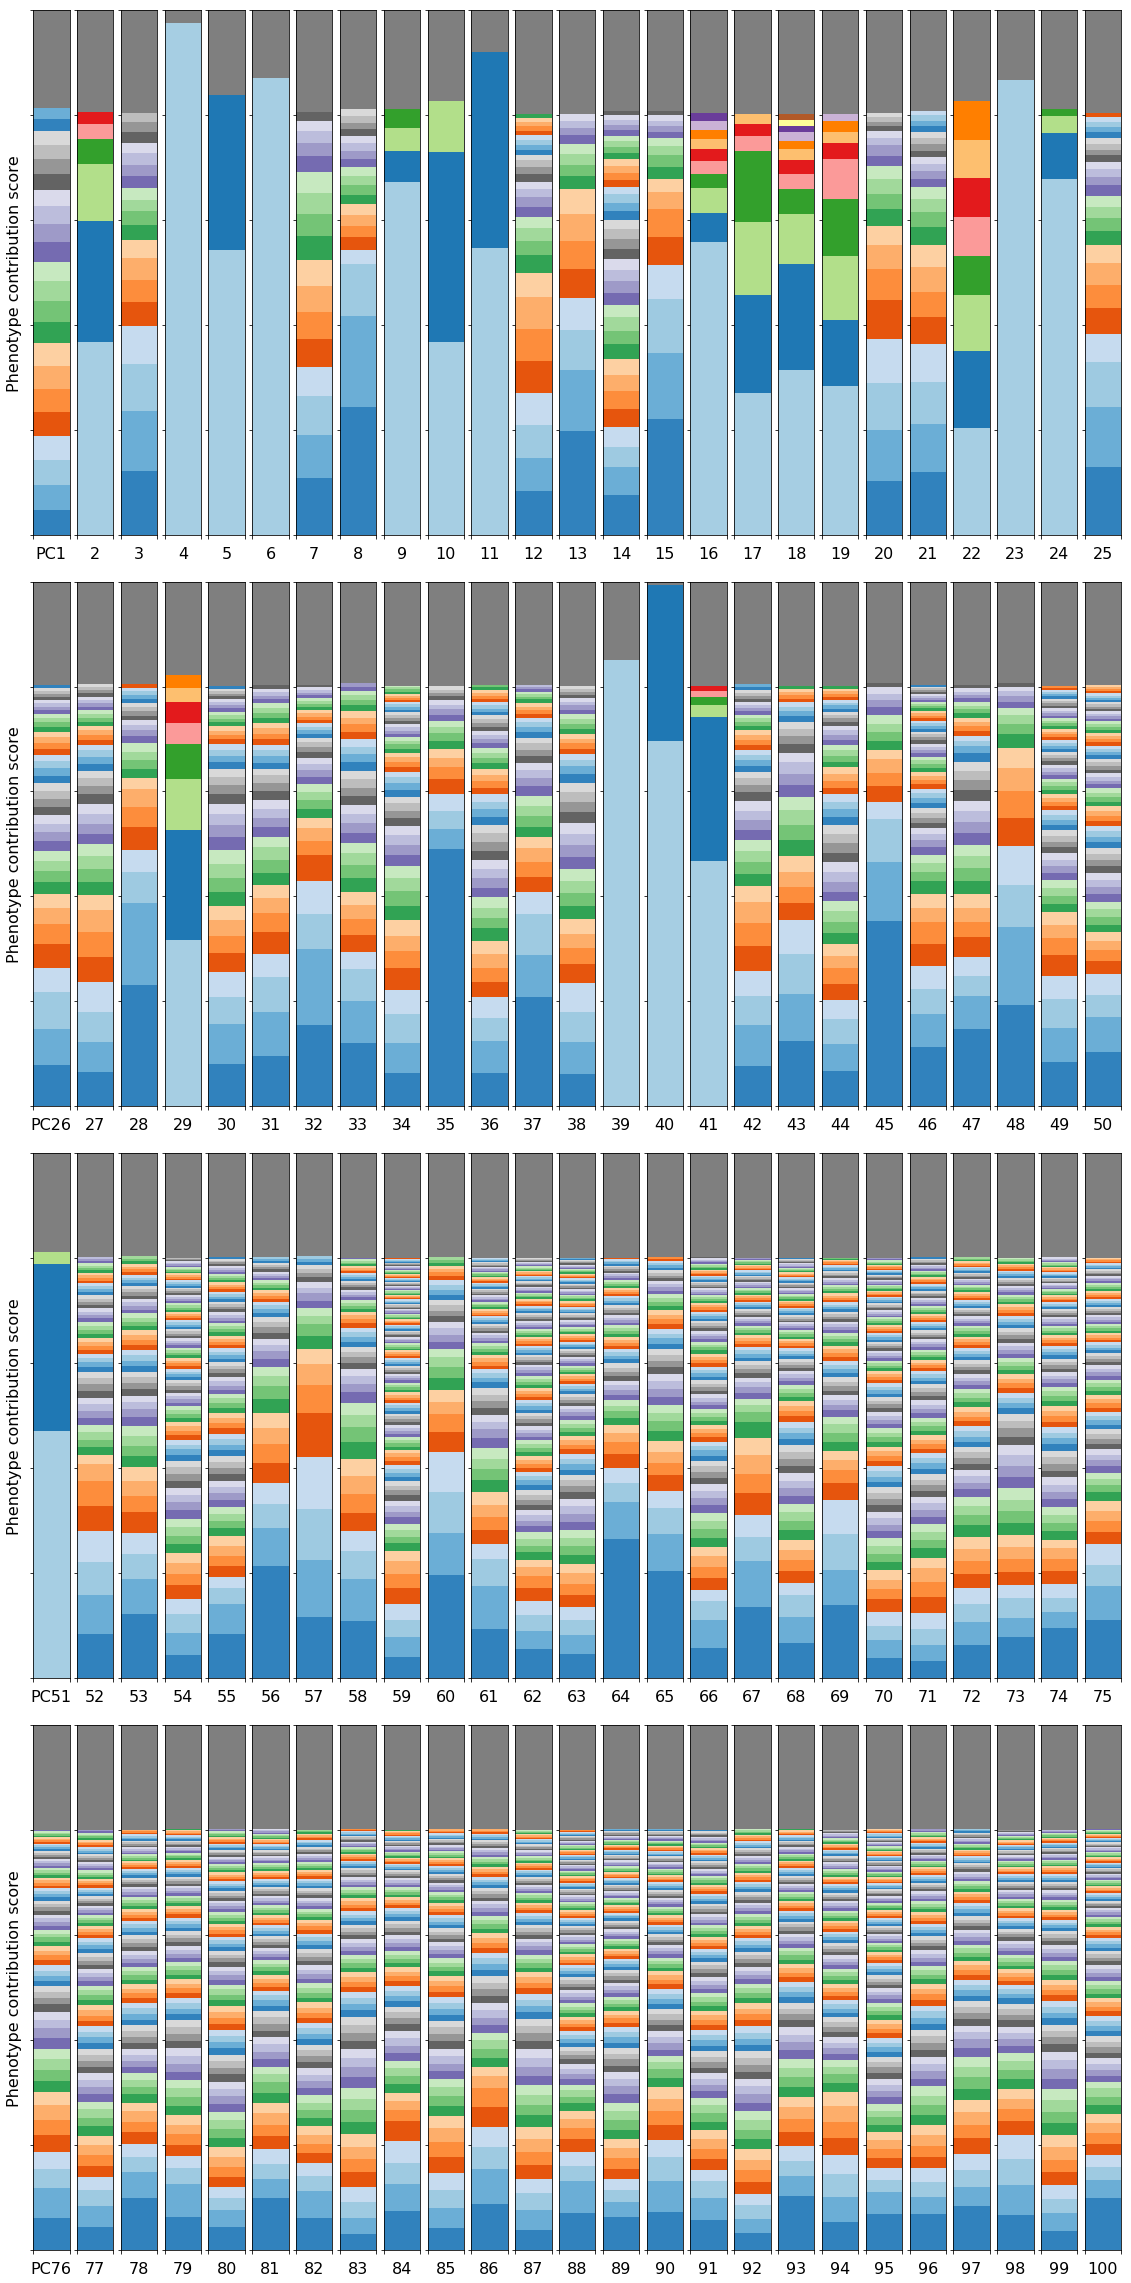

In [25]:
fig = plt.figure(figsize=(16, 32))
gs = gridspec.GridSpec(4, 25)
fig_axs = [fig.add_subplot(sp) for sp in gs]

for i in range(0, 100):
    plotd = d.plot_data_contribution_phe(i, contribution_cumsum_thr=0.80, append_others=True)
    if(i % 25 == 0):
        
        fig_axs[i] = yt_misc.plot_ax_stacked_bar(
            fig_axs[i], plotd['y'], plotd['xticklabels'], 
            ylabel = plotd['ylabel'], xlabel = 'PC{}'.format(i + 1))
    else:
        fig_axs[i] = yt_misc.plot_ax_stacked_bar(
            fig_axs[i], plotd['y'], plotd['xticklabels'], 
            show_xticklabels = False, xlabel = str(i + 1))
        
gs.tight_layout(fig, rect=[0, 0, 1, 1], w_pad=-.1) 

In [8]:
pcs, score = d.get_topk_pcs_for_phe_with_scores_by_label('asthma')